#**Importing Libraries and Dataset**

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.linear_model import Ridge # ridge regression package
from sklearn.linear_model import Lasso # lasso regression package
from sklearn.linear_model import ElasticNet # elasticnet regression package
from sklearn.ensemble import RandomForestRegressor # random forest ensemble package

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
#from sklearn.metrics import mean_absolute_error as mae # another measurement metric
#from sklearn.metrics import r2_score as r2 #another measurement metric
from sklearn.preprocessing import StandardScaler #Standardising

In [126]:
# Read Data
#data=pd.read_csv("nyc-rolling-sales.csv", index_col=0)    ----- for colab
data=pd.read_csv("nyc-rolling-sales.csv")
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# **Look at the Data**

In [127]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [129]:
data.shape

(84548, 22)

In [128]:
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [131]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


# **Profiling**

In [132]:
!pip install pandas_profiling

In [133]:
import pandas_profiling as pp

In [134]:
report=pp.ProfileReport(data)

In [135]:
report.to_file('data_assessment1.html')

# **Cleaning of Data**


In [136]:
# Convert to numeric
data['SALE_PRICE']=pd.to_numeric(data['SALE_PRICE'],errors='coerce')
data['GROSS_SQUARE_FEET']=pd.to_numeric(data['GROSS_SQUARE_FEET'],errors='coerce')
data['LAND_SQUARE_FEET']=pd.to_numeric(data['LAND_SQUARE_FEET'],errors='coerce')

# Convert to string    --- Can't Merge the data from dummy variables and feature scaling
#data['BOROUGH']=data['BOROUGH'].astype('category')
#data['BUILDING_CLASS_CATEGORY']=data['BUILDING_CLASS_CATEGORY'].astype('category')
#data['TAX_CLASS_AT_TIME_OF_SALE']=data['TAX_CLASS_AT_TIME_OF_SALE'].astype('category')

# Convert to string
data['SALE_DATE']=pd.to_datetime(data['SALE_DATE'],errors='coerce')

In [137]:
# Check Data type
data[['SALE_PRICE','GROSS_SQUARE_FEET','LAND_SQUARE_FEET',"BOROUGH","SALE_DATE","BUILDING_CLASS_CATEGORY","TAX_CLASS_AT_TIME_OF_SALE"]].dtypes

SALE_PRICE                          float64
GROSS_SQUARE_FEET                   float64
LAND_SQUARE_FEET                    float64
BOROUGH                               int64
SALE_DATE                    datetime64[ns]
BUILDING_CLASS_CATEGORY              object
TAX_CLASS_AT_TIME_OF_SALE             int64
dtype: object

In [138]:
data.shape

(84548, 22)

In [139]:
# new column SALE YEAR from SALE DATE
data['SALE_YEAR'] = pd.DatetimeIndex(data['SALE_DATE']).year

In [163]:
data.head()

,Unnamed_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,2016


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
Unnamed_0                         84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING_CLASS_CATEGORY           84548 non-null object
TAX_CLASS_AT_PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING_CLASS_AT_PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT_NUMBER                  84548 non-null object
ZIP_CODE                          84548 non-null int64
RESIDENTIAL_UNITS                 84548 non-null int64
COMMERCIAL_UNITS                  84548 non-null int64
TOTAL_UNITS                       84548 non-null int64
LAND_SQUARE_FEET                  58296 non-null float64
GR

In [142]:
# Handling missing data
# converts null value to 0
#data['SALE PRICE'].isna().sum()
data['SALE_PRICE']=data['SALE_PRICE'].fillna(0)
data['GROSS_SQUARE_FEET']=data['GROSS_SQUARE_FEET'].fillna(data['GROSS_SQUARE_FEET'].mean())
data['LAND_SQUARE_FEET']=data['LAND_SQUARE_FEET'].fillna(data['LAND_SQUARE_FEET'].mean())


FOR SALE PRICE=0

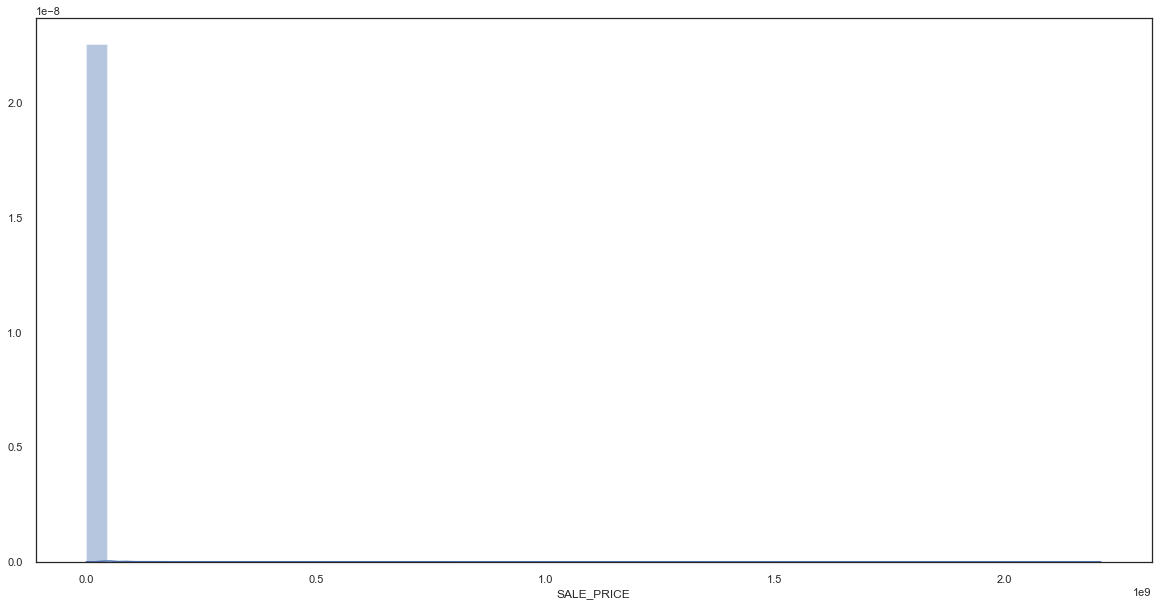

In [143]:
sns.distplot(data['SALE_PRICE'])

In [144]:
#remove rows in data where sale price is Zero
data=data[data['SALE_PRICE']>10000]

In [145]:
data['SALE_PRICE'].describe()

count    5.840000e+04
mean     1.529690e+06
std      1.247003e+07
min      1.000100e+04
25%      3.893202e+05
50%      6.400000e+05
75%      1.100000e+06
max      2.210000e+09
Name: SALE_PRICE, dtype: float64

FOR GROSS SQUARE FEET=0

In [ ]:
# sns.distplot(data['GROSS SQUARE FEET'])   ---- fillna ng mean kasi malaki mababawas sa data

In [ ]:
#remove rows in data where sale price is Zero
# data=data[data['GROSS SQUARE FEET']>0]

In [ ]:
# data['GROSS SQUARE FEET'].describe()

FOR LAND SQUARE FEET=0

In [ ]:
# sns.distplot(data['LAND SQUARE FEET'])     -----same reason with gross square

In [ ]:
#remove rows in data where sale price is Zero
# data=data[data['LAND SQUARE FEET']>0]

In [ ]:
# data['LAND SQUARE FEET'].describe()

In [146]:
data.shape

(58400, 23)

In [ ]:
# Handling missing data
# Or use Impute to missing data
# NEED TO STUDY PA

Feature Scaling

In [152]:
#Standardising

s_columns=["BOROUGH","BLOCK", "LOT", "ZIP_CODE", "RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET", "GROSS_SQUARE_FEET", "YEAR_BUILT", "SALE_YEAR", "SALE_PRICE"]
s_data=data[s_columns]

In [153]:
s_data.shape

(58400, 12)

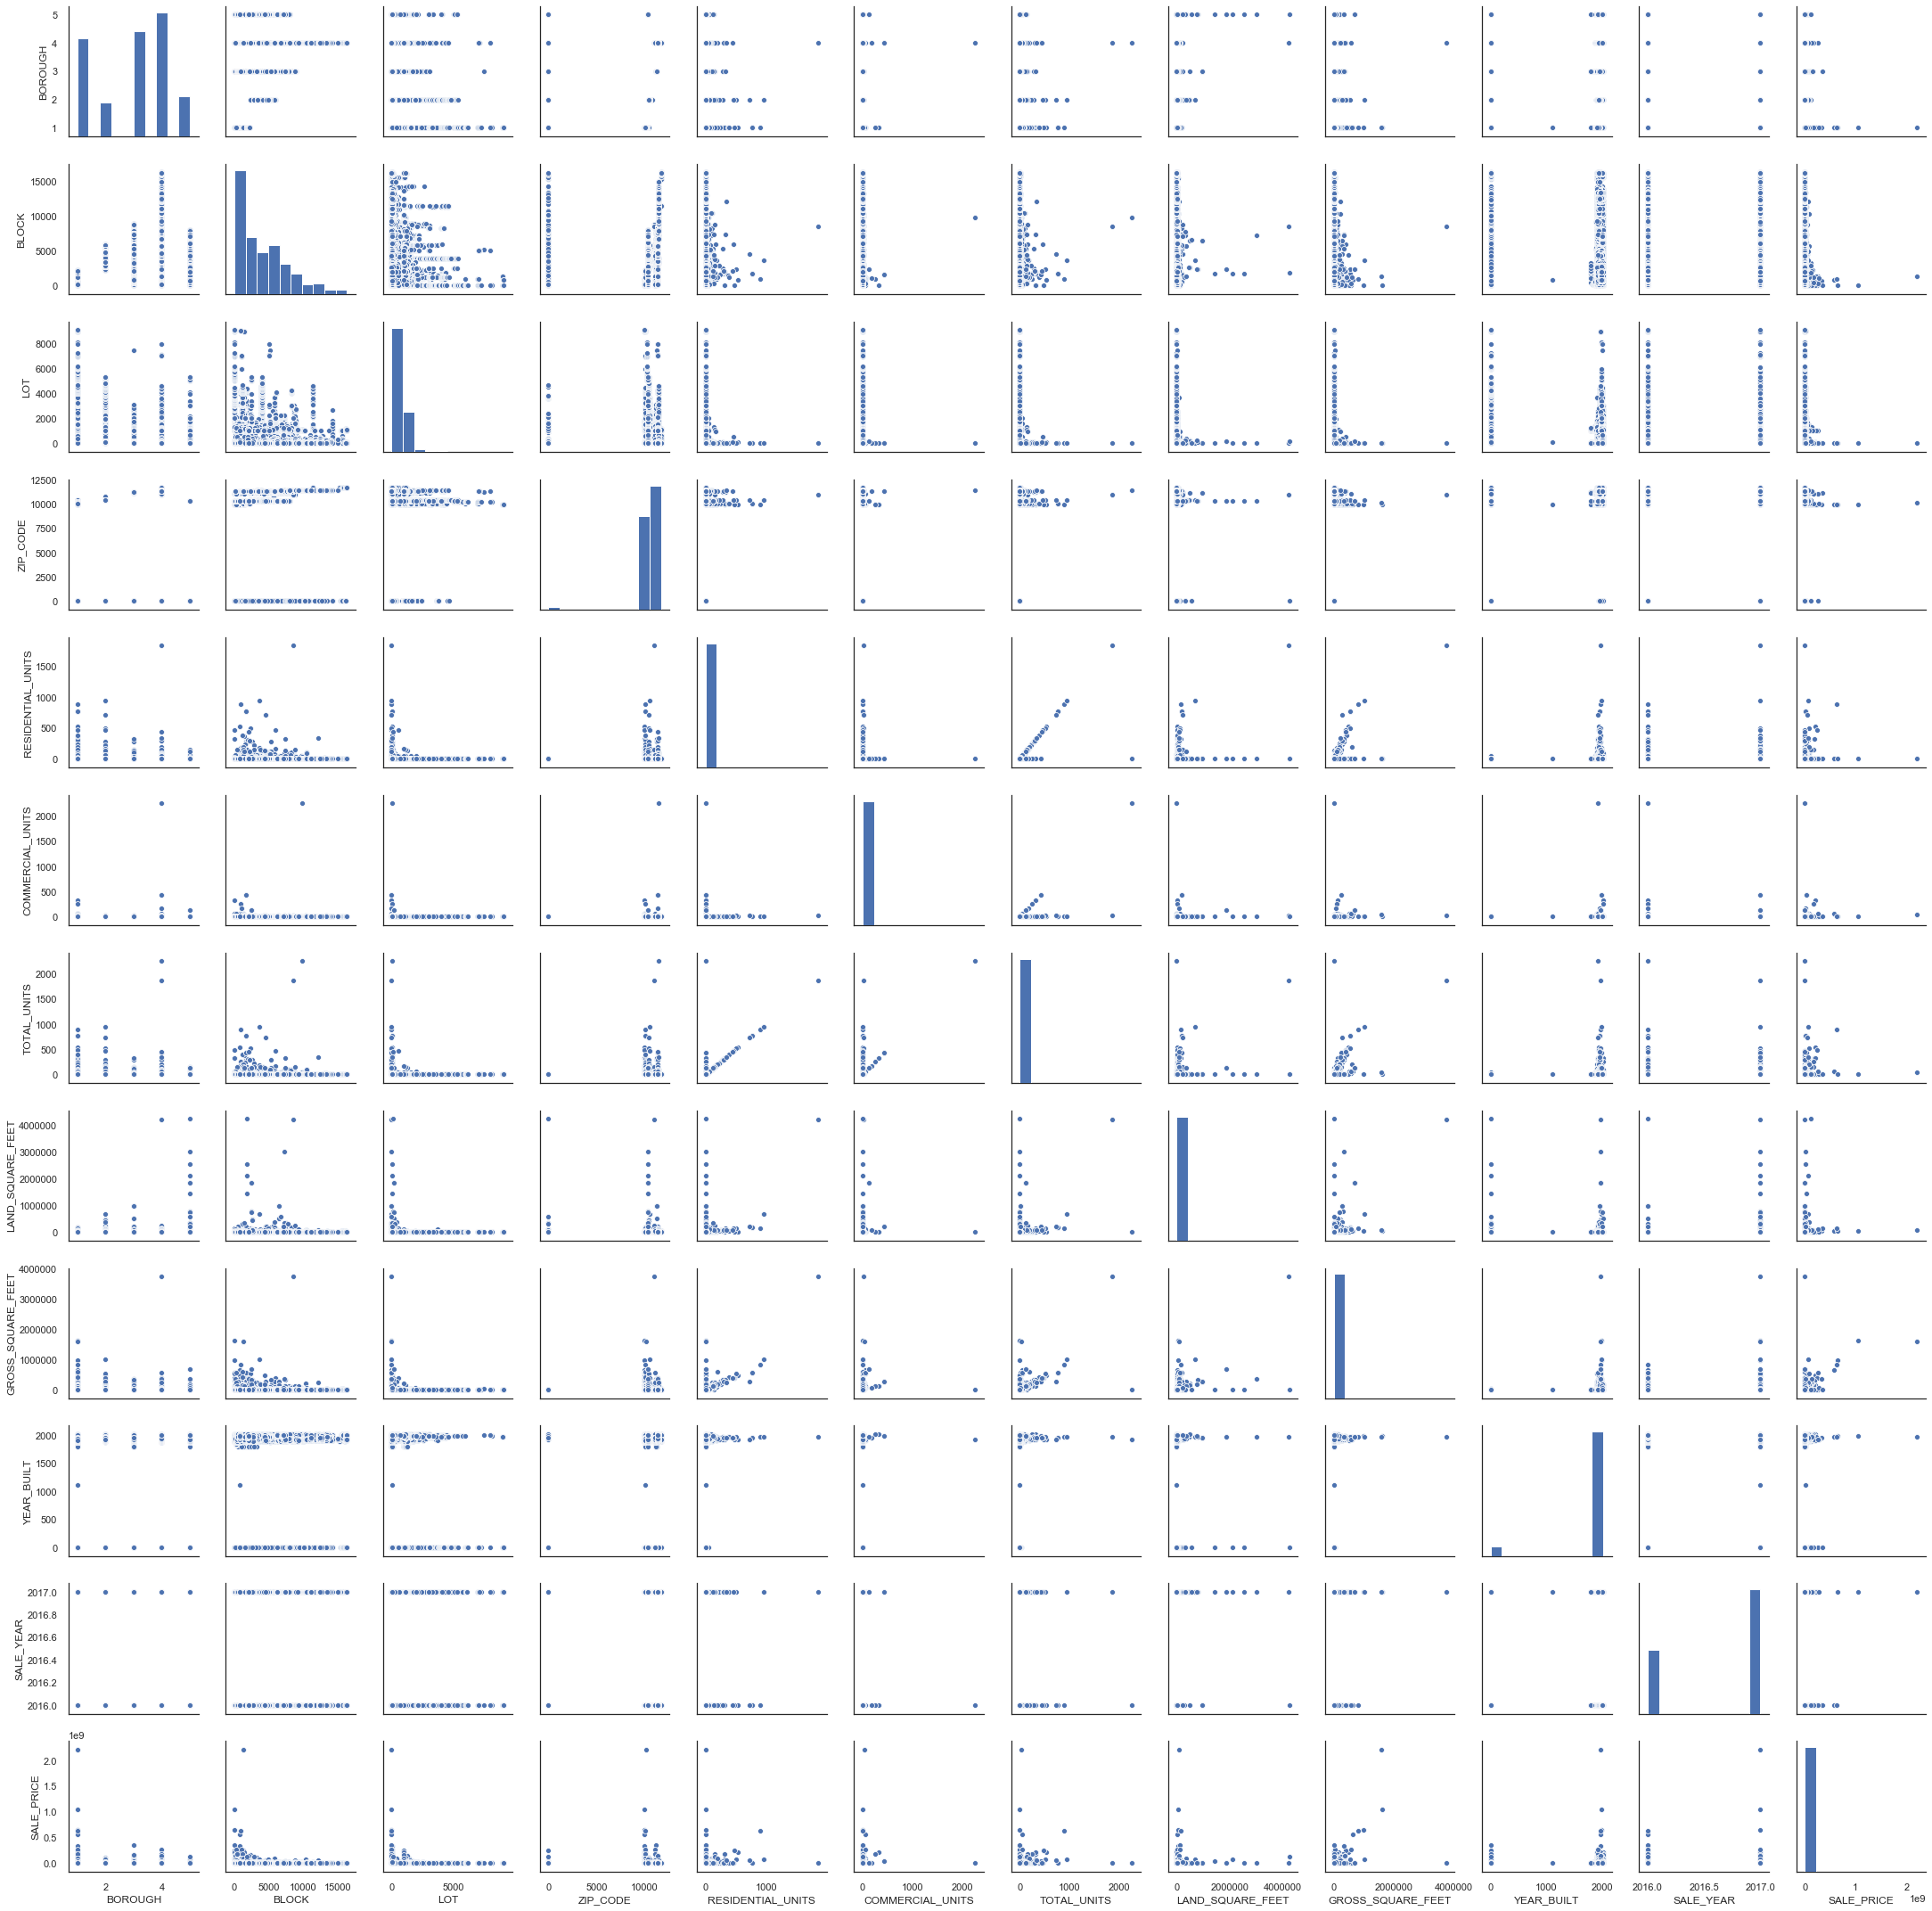

In [154]:
sns.pairplot(s_data)

In [155]:
#Instantiate Standard Scaler
scaler=StandardScaler()
scaler.fit(s_data)

#Transform Original Data to Zero mean and unit variance
transformed_data=scaler.transform(s_data)

#Convert to original data frame schema
transformed_s_data=pd.DataFrame(transformed_data,columns=s_data.columns)

In [156]:
transformed_s_data.shape

(58400, 12)

In [157]:
transformed_s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58400 entries, 0 to 58399
Data columns (total 12 columns):
BOROUGH              58400 non-null float64
BLOCK                58400 non-null float64
LOT                  58400 non-null float64
ZIP_CODE             58400 non-null float64
RESIDENTIAL_UNITS    58400 non-null float64
COMMERCIAL_UNITS     58400 non-null float64
TOTAL_UNITS          58400 non-null float64
LAND_SQUARE_FEET     58400 non-null float64
GROSS_SQUARE_FEET    58400 non-null float64
YEAR_BUILT           58400 non-null float64
SALE_YEAR            58400 non-null float64
SALE_PRICE           58400 non-null float64
dtypes: float64(12)
memory usage: 5.3 MB


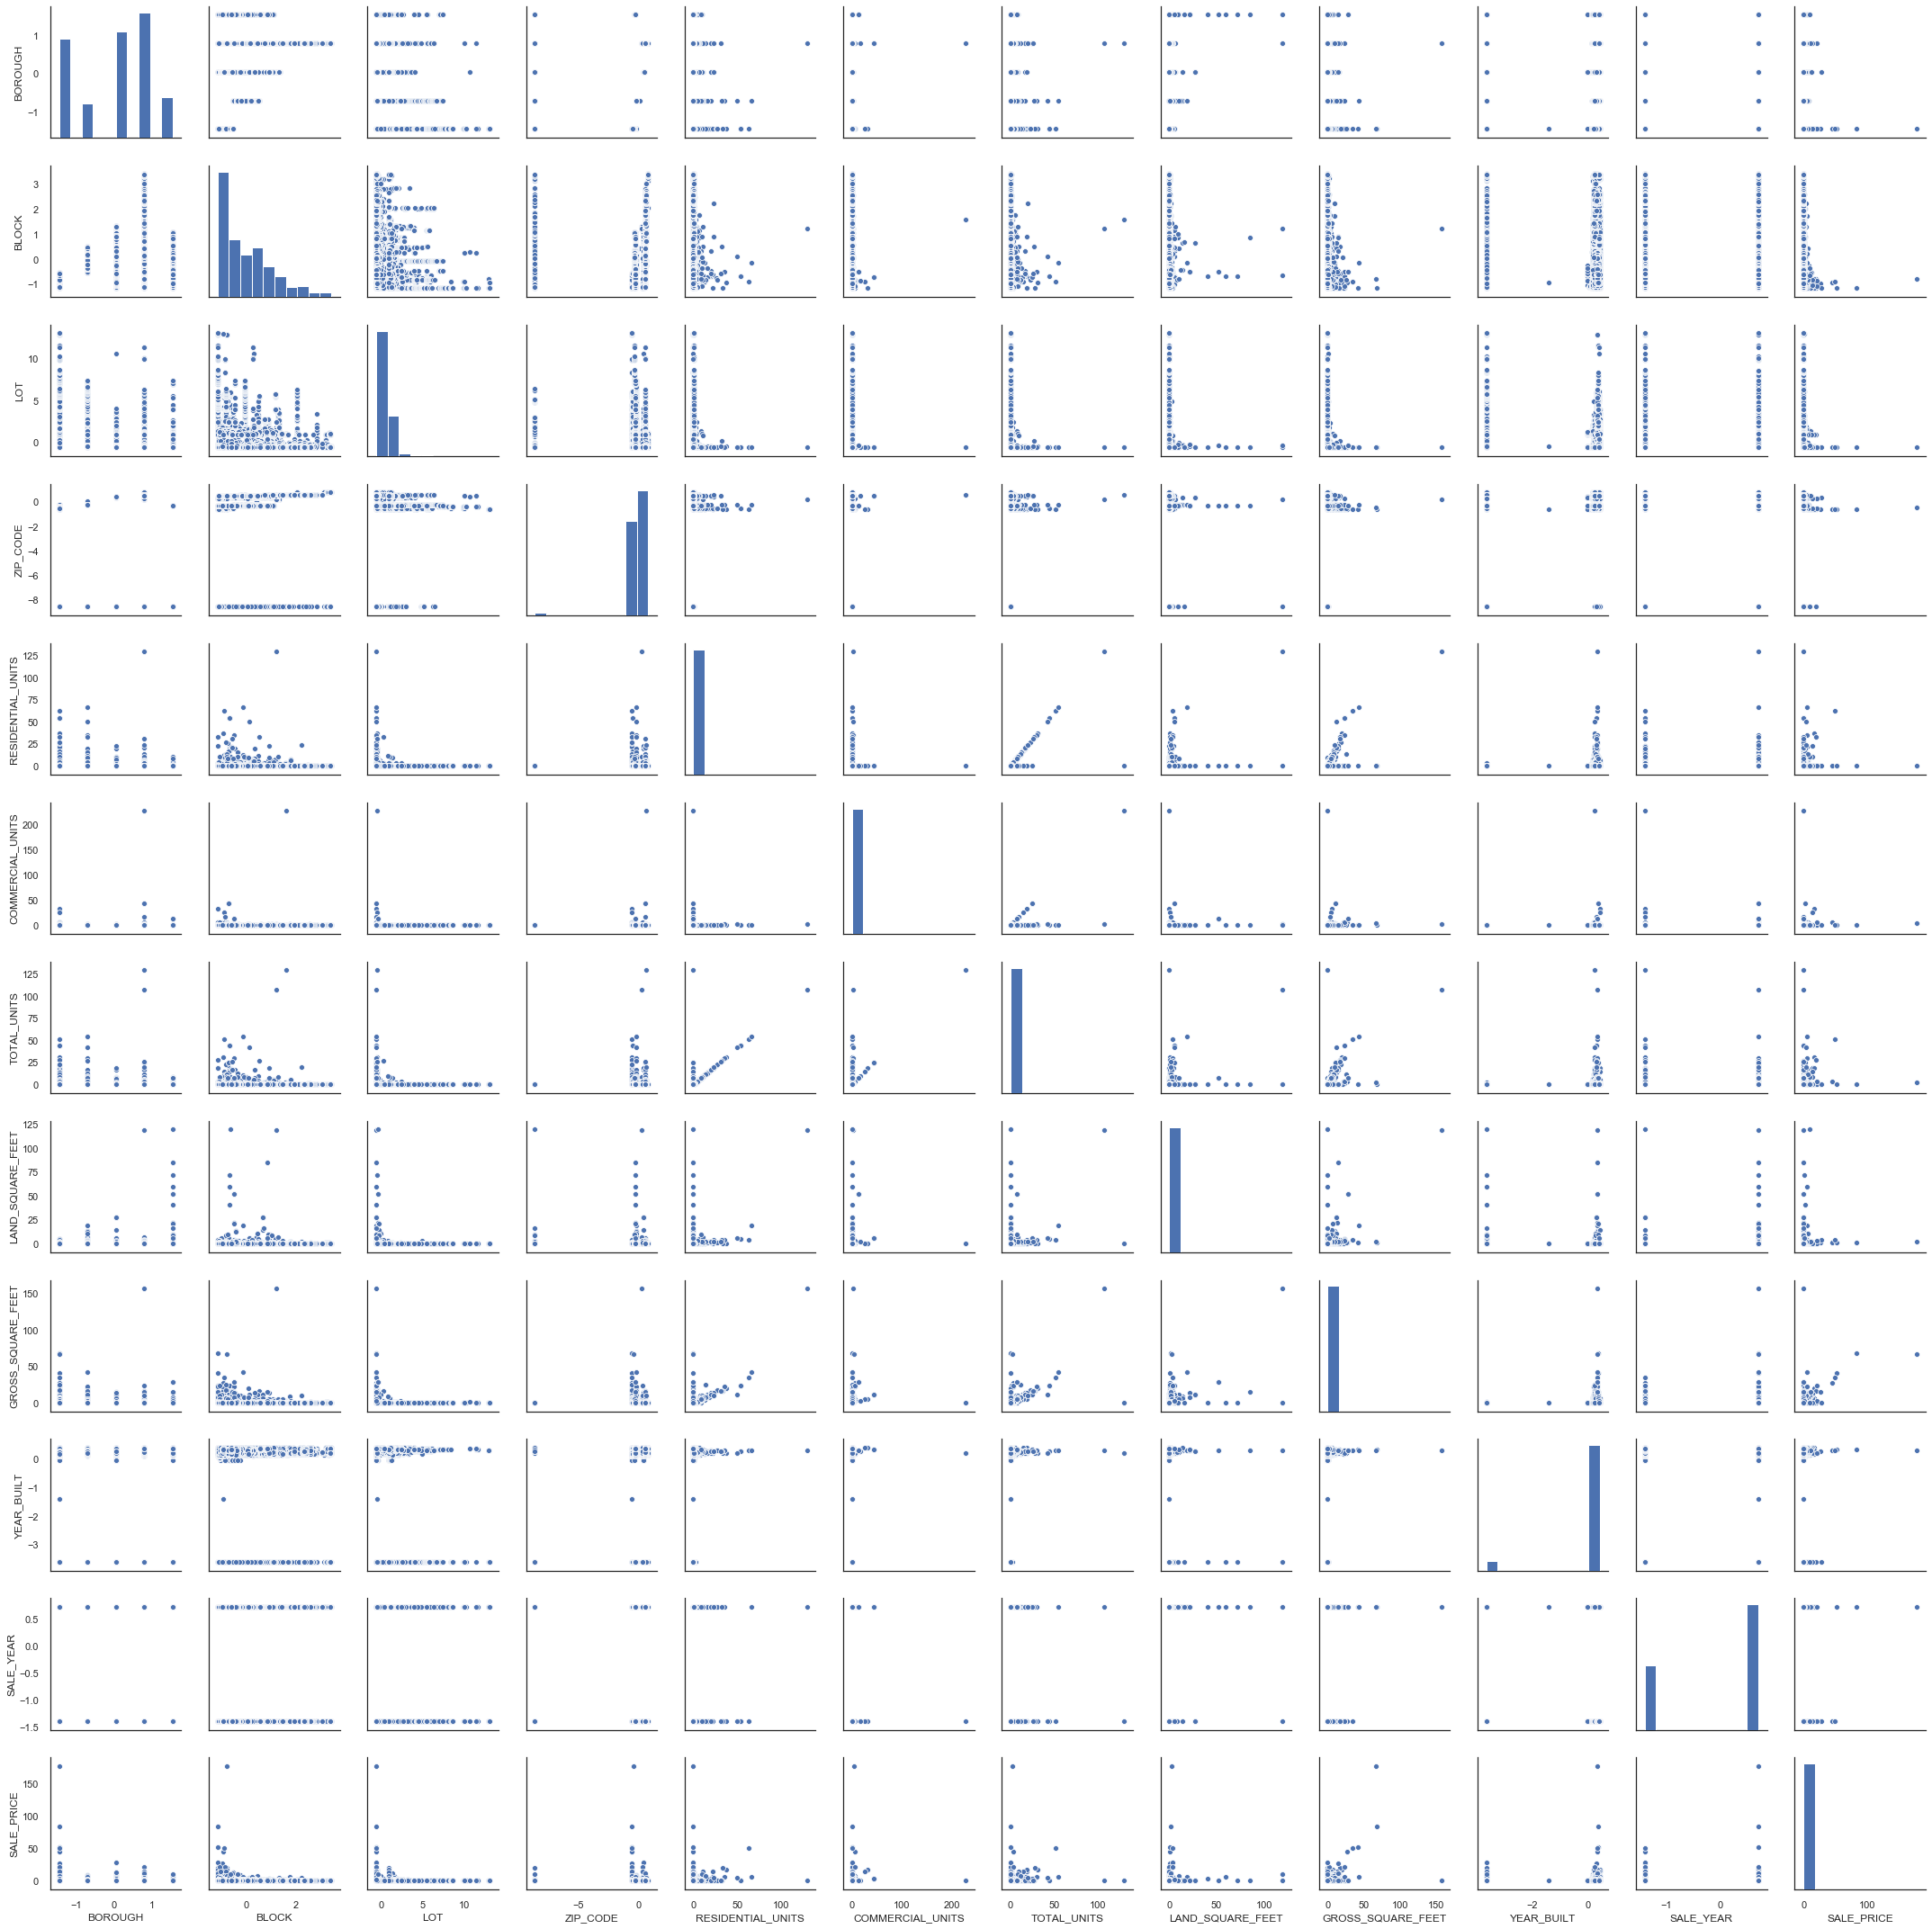

In [158]:
sns.pairplot(transformed_s_data)

Dummy Variables

In [ ]:
#d_columns = ['BOROUGH','BUILDING_CLASS_CATEGORY','TAX_CLASS_AT_TIME_OF_SALE']      ----can't merge this to data(standardising)
#d_data = data[d_columns]

In [ ]:
#data[d_columns].shape

In [ ]:
#dummies_data=pd.get_dummies(data[d_columns].astype(str))

In [ ]:
#dummies_data.head()

In [ ]:
#dummies_data.shape

In [ ]:
#dummies_data.info()

Concatenate transformed_s_data and dummies_data

In [ ]:
#after merging data from dummy become NaN..even if i changed the datatype...Don't know how to fix it,huhu

#new_data = pd.merge(transformed_s_data, dummies_data1,left_on='SALE PRICE',right_on='TAX CLASS AT TIME OF SALE_4')
#,how='left',indicator=True

In [ ]:
#new_data.head()


In [ ]:
#new_data = pd.concat([transformed_s_data,dummies_data],axis=1)

In [ ]:
#new_data.shape

In [ ]:
#new_data.head()

do not includ "TAX CLASS AT PRESENT", "EASE-MENT","NEIGHBORHOOD","BUILDING CLASS AT PRESENT","APARTMENT NUMBER","ADDRESS","SALE DATE","BUILDING CLASS AT TIME OF SALE",kasi kulang,empty,too many,kulang,hindi importante,hindi importante,respectively.
include "BOROUGH","BUILDING CLASS CATEGORY","BLOCK","LOT","
ZIP CODE","RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","YEAR BUILT","TAX CLASS AT TIME OF SALE","SALE PRICE"

# **Look at the Cleaned Data**

In [ ]:
#new_data.head()

In [ ]:
#new_data.shape

In [ ]:
#new_data.columns

In [ ]:
#new_data.info()

# **Correlation of features to each other**

In [159]:
#correlation_coefficients = new_data.corr()
correlation_coefficients = transformed_s_data.corr()
correlation_coefficients

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_YEAR,SALE_PRICE
BOROUGH,1.000000,0.444525,-0.266183,0.293941,-0.015641,0.001285,-0.012210,0.016182,-0.049644,0.115755,-0.020208,-0.076978
BLOCK,0.444525,1.000000,-0.239911,0.263611,-0.007633,0.001809,-0.005492,-0.001210,-0.039944,0.088229,-0.015055,-0.062426
LOT,-0.266183,-0.239911,1.000000,-0.158853,-0.030236,-0.008560,-0.028626,-0.014032,-0.019849,-0.310551,0.024773,0.009960
ZIP_CODE,0.293941,0.263611,-0.158853,1.000000,0.006159,0.002715,0.006602,-0.031527,-0.018953,0.330541,-0.030190,-0.034667
RESIDENTIAL_UNITS,-0.015641,-0.007633,-0.030236,0.006159,1.000000,0.013311,0.821761,0.340381,0.715925,0.019922,-0.013008,0.136136
COMMERCIAL_UNITS,0.001285,0.001809,-0.008560,0.002715,0.013311,1.000000,0.580679,0.040779,0.065909,0.004214,-0.006870,0.046413
TOTAL_UNITS,-0.012210,-0.005492,-0.028626,0.006602,0.821761,0.580679,1.000000,0.300379,0.620485,0.018224,-0.014549,0.137364
LAND_SQUARE_FEET,0.016182,-0.001210,-0.014032,-0.031527,0.340381,0.040779,0.300379,1.000000,0.494941,-0.017120,-0.000433,0.061263
GROSS_SQUARE_FEET,-0.049644,-0.039944,-0.019849,-0.018953,0.715925,0.065909,0.620485,0.494941,1.000000,0.016145,-0.008218,0.500720
YEAR_BUILT,0.115755,0.088229,-0.310551,0.330541,0.019922,0.004214,0.018224,-0.017120,0.016145,1.000000,-0.024544,-0.007294


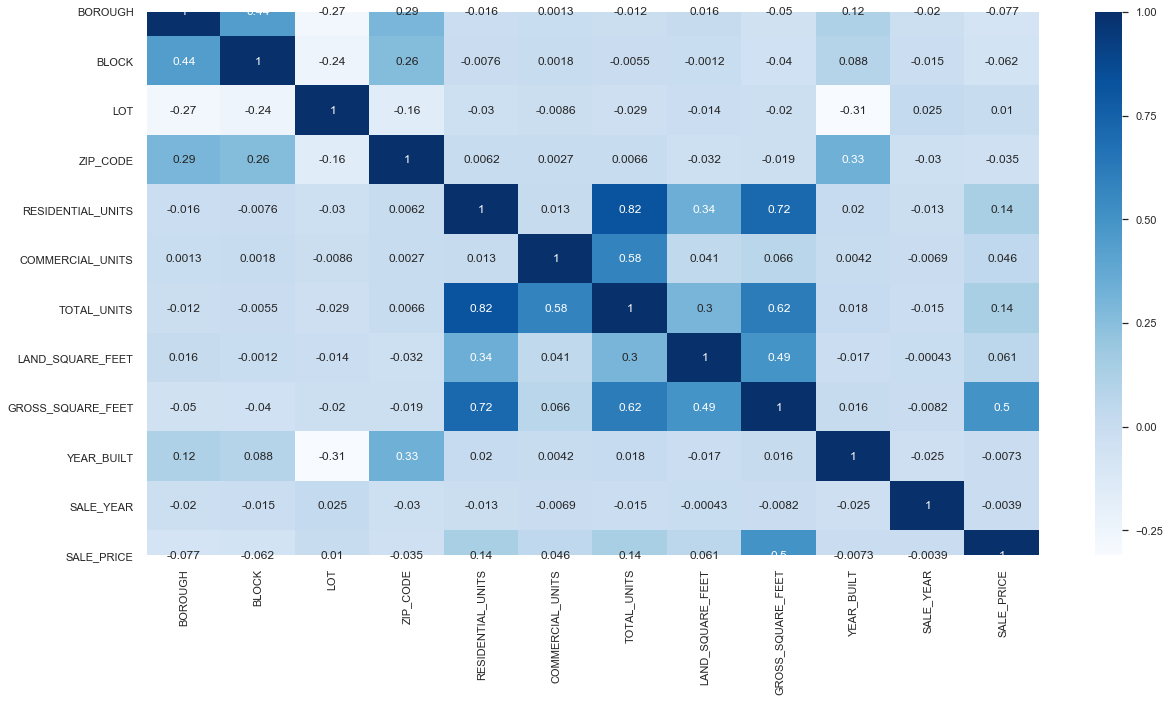

In [160]:
sns.heatmap(correlation_coefficients,annot=True,cmap="Blues")

# **Feature Selection and Train Test Split**

In [161]:
# Define Features
features =["BOROUGH","BLOCK","LOT", "ZIP_CODE", "RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET", "GROSS_SQUARE_FEET", "YEAR_BUILT", "SALE_YEAR"]
#features =["BOROUGH","RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET"]
#features =["BLOCK", "LOT", "ZIP_CODE", "RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET", "GROSS_SQUARE_FEET", "YEAR_BUILT", "SALE_YEAR", "SALE_PRICE","BOROUGH",'BUILDING_CLASS_CATEGORY","TAX_CLASS_AT_TIME_OF_SALE"]

# Set X
X= transformed_s_data[features]
#X = new_data[features]

In [164]:
# Set y
#y = new_data['SALE PRICE']
y= transformed_s_data['SALE_PRICE']

In [165]:
X.shape


(58400, 11)

In [166]:
y.shape

(58400,)

In [167]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# **Modelling**

# **Linear Regression**

In [168]:
# Initialize model
model_linear = LinearRegression() 

In [169]:
# Fit Model
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
# get coefficients
coefficient_linear = model_linear.coef_

In [171]:
# get intercept
intercept_linear = model_linear.intercept_

In [172]:
# print coefficient
coefficient_linear

array([-2.26867979e-02, -1.49830792e-02,  4.37460489e-03,  1.49427900e-03,
       -1.53693402e+00, -9.76975872e-01,  1.71435224e+00, -1.18192138e-01,
        7.82287449e-01, -1.24872964e-02, -1.84807674e-03])

In [173]:
# print intercept
intercept_linear

-0.0023160616951005864

In [174]:
# calculate the R-squared
model_linear.score(X_test, y_test)

0.260449393245352

In [175]:
y_predicted_linear = model_linear.predict(X_test)

In [176]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd_linear = pd.DataFrame((list(zip(features, model_linear.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [177]:
# print table of coefficients for contribution chart
coefficients_pd_linear

,Features,Coefficients
0,BOROUGH,-22.686798
1,BLOCK,-14.983079
2,LOT,4.374605
3,ZIP_CODE,1.494279
4,RESIDENTIAL_UNITS,-1536.934022
5,COMMERCIAL_UNITS,-976.975872
6,TOTAL_UNITS,1714.352238
7,LAND_SQUARE_FEET,-118.192138
8,GROSS_SQUARE_FEET,782.287449
9,YEAR_BUILT,-12.487296


**Model Error** - *Linear*

In [178]:
linear_rmse = np.sqrt(mse(y_predicted_linear, y_test)) # Root mean squared error for linear\
linear_rmse

1.1242537531359542

# **Ridge**

In [179]:
# Initialize model
model_ridge = Ridge(alpha=0.01) 

In [180]:
# Fit Model
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [181]:
# get coefficients
coefficient_ridge = model_ridge.coef_

In [182]:
# get intercept
intercept_ridge = model_ridge.intercept_

In [183]:
# print coefficient
coefficient_ridge

array([-2.26859291e-02, -1.49868538e-02,  4.39275997e-03,  1.50138238e-03,
       -1.51776646e+00, -9.63559983e-01,  1.69081016e+00, -1.18192374e-01,
        7.82287722e-01, -1.24941437e-02, -1.85079184e-03])

In [184]:
# print intercept
intercept_ridge

-0.0023163139576431184

In [185]:
# calculate the R-squared
model_ridge.score(X_test, y_test)

0.26045255714839144

In [186]:
y_predicted_ridge = model_ridge.predict(X_test)

In [187]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd_ridge = pd.DataFrame((list(zip(features, model_ridge.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [188]:
# print table of coefficients for contribution chart
coefficients_pd_ridge

,Features,Coefficients
0,BOROUGH,-22.685929
1,BLOCK,-14.986854
2,LOT,4.392760
3,ZIP_CODE,1.501382
4,RESIDENTIAL_UNITS,-1517.766462
5,COMMERCIAL_UNITS,-963.559983
6,TOTAL_UNITS,1690.810157
7,LAND_SQUARE_FEET,-118.192374
8,GROSS_SQUARE_FEET,782.287722
9,YEAR_BUILT,-12.494144


**Model Error** - *Ridge*

In [189]:
ridge_rmse = np.sqrt(mse(y_predicted_ridge, y_test)) # Root mean squared error for ridge
ridge_rmse

1.1242513482743812

# **Lasso**

In [190]:
# Initialize model
model_lasso = Lasso(alpha=0.00099) 

In [191]:
# Fit Model
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [192]:
# get coefficients
coefficient_lasso = model_lasso.coef_

In [193]:
# get intercept
intercept_lasso = model_lasso.intercept_

In [194]:
# print coefficient
coefficient_lasso

array([-2.19003308e-02, -1.44756724e-02,  5.25310637e-03,  3.21943069e-05,
       -1.37296580e-01,  0.00000000e+00, -0.00000000e+00, -1.15774584e-01,
        7.77335292e-01, -1.16013242e-02, -1.04629088e-03])

In [195]:
# print intercept
intercept_lasso

-0.002326625294449648

In [196]:
# calculate the R-squared
model_lasso.score(X_test, y_test)

0.25854002054756453

In [197]:
y_predicted_lasso = model_lasso.predict(X_test)

In [198]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd_lasso = pd.DataFrame((list(zip(features, model_lasso.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [199]:
# print table of coefficients for contribution chart
coefficients_pd_lasso

,Features,Coefficients
0,BOROUGH,-21.900331
1,BLOCK,-14.475672
2,LOT,5.253106
3,ZIP_CODE,0.032194
4,RESIDENTIAL_UNITS,-137.296580
5,COMMERCIAL_UNITS,0.000000
6,TOTAL_UNITS,-0.000000
7,LAND_SQUARE_FEET,-115.774584
8,GROSS_SQUARE_FEET,777.335292
9,YEAR_BUILT,-11.601324


**Model Error** - *Lasso*

In [200]:
lasso_rmse = np.sqrt(mse(y_predicted_lasso, y_test)) # Root mean squared error for lasso
lasso_rmse

1.1257041174866487

# **ElasticNet**

In [201]:
# Initialize model
model_elasticnet = ElasticNet() 

In [202]:
# Fit Model
model_elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [203]:
# get coefficients
coefficient_elasticnet = model_ridge.coef_

In [204]:
# get intercept
intercept_elasticnet = model_elasticnet.intercept_

In [205]:
# print coefficient
coefficient_elasticnet

array([-2.26859291e-02, -1.49868538e-02,  4.39275997e-03,  1.50138238e-03,
       -1.51776646e+00, -9.63559983e-01,  1.69081016e+00, -1.18192374e-01,
        7.82287722e-01, -1.24941437e-02, -1.85079184e-03])

In [206]:
# print intercept
intercept_elasticnet

-0.00283395882444966

In [207]:
# calculate the R-squared
model_elasticnet.score(X_test, y_test)

-2.9370158808772473e-05

In [208]:
y_predicted_elasticnet = model_elasticnet.predict(X_test)

In [209]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd_elasticnet = pd.DataFrame((list(zip(features, model_elasticnet.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [210]:
# print table of coefficients for contribution chart
coefficients_pd_elasticnet

,Features,Coefficients
0,BOROUGH,-0.0
1,BLOCK,-0.0
2,LOT,0.0
3,ZIP_CODE,-0.0
4,RESIDENTIAL_UNITS,0.0
5,COMMERCIAL_UNITS,0.0
6,TOTAL_UNITS,0.0
7,LAND_SQUARE_FEET,0.0
8,GROSS_SQUARE_FEET,0.0
9,YEAR_BUILT,-0.0


**Model Error** - *ElasticNet*

In [211]:
elasticnet_rmse = np.sqrt(mse(y_predicted_elasticnet, y_test)) # Root mean squared error for elasticnet
elasticnet_rmse

1.3073346582914533

# **Random Forest**

In [212]:
# Initialize model
model_randomforest = RandomForestRegressor() 

In [213]:
# Fit Model
model_randomforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [214]:
# get coefficients
#coefficient_randomforest = model_randomforest.coef_

In [215]:
# get intercept
#intercept_randomforest = model_randomforest.intercept_

In [216]:
# print coefficient
#coefficient_randomforest

In [217]:
# print intercept
#intercept_randomforest

In [218]:
# calculate the R-squared
model_randomforest.score(X_test, y_test)

0.4636195377600367

In [219]:
y_predicted_randomforest = model_randomforest.predict(X_test)

In [220]:
# put coefficients into dataframe
# pair the feature names with the coefficients
#coefficients_pd_randomforest = pd.DataFrame((list(zip(features, model_randomforest.coef_ * 1000))), columns = ['Features', 'Coefficients'])

In [221]:
# print table of coefficients for contribution chart
#coefficients_pd_randomforest

**Model Error** - *Random Forest*

In [222]:
randomforest_rmse = np.sqrt(mse(y_predicted_randomforest, y_test)) # Root mean squared error for randomforest
randomforest_rmse

0.9574516949606784

# **Summary of RMSE**

In [223]:
RMSE = pd.DataFrame((list(zip(["Linear","Ridge","Lasso","ElasticNet","Random Forest"], [linear_rmse,ridge_rmse,lasso_rmse,elasticnet_rmse,randomforest_rmse]))), columns = ['Models', 'Model Error RMSE'])

In [224]:
RMSE

,Models,Model Error RMSE
0,Linear,1.124254
1,Ridge,1.124251
2,Lasso,1.125704
3,ElasticNet,1.307335
4,Random Forest,0.957452
